In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import plotly
import plotly.express as px
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import cufflinks as cf
from sklearn.metrics import accuracy_score

In [3]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
df=pd.read_csv(r'C:\Users\Srishiti\Desktop\projects\heart disease\heart.csv')

In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [7]:
df['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [8]:
df.groupby('target').size()

target
0    138
1    165
dtype: int64

In [9]:
df.shape

(303, 14)

In [10]:
df.size

4242

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
#Visualization

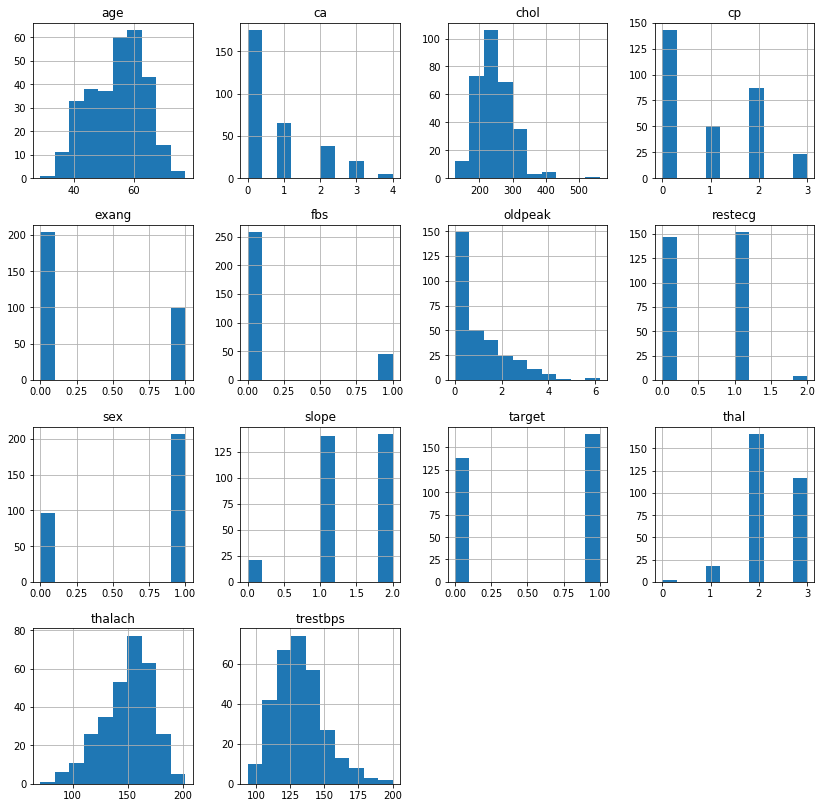

In [14]:
df.hist(figsize=(14,14))
plt.show()

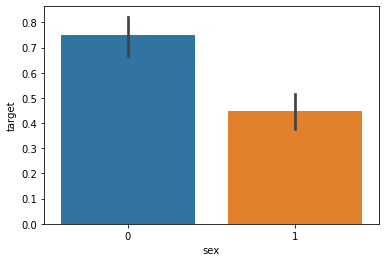

In [15]:
sns.barplot(df['sex'],df['target'])
plt.show()

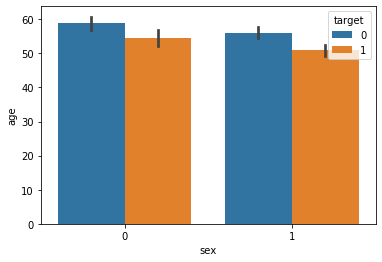

In [16]:
sns.barplot(df['sex'],df['age'],hue=df['target'])
plt.show()

In [17]:
px.bar(df,df['sex'],df['target'])

In [18]:
numeric_columns=['trestbps','chol','age','oldpeak','thalach']

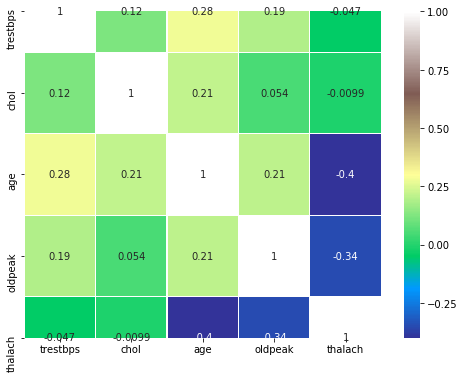

In [19]:
sns.heatmap(df[numeric_columns].corr(),annot=True,cmap='terrain',linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

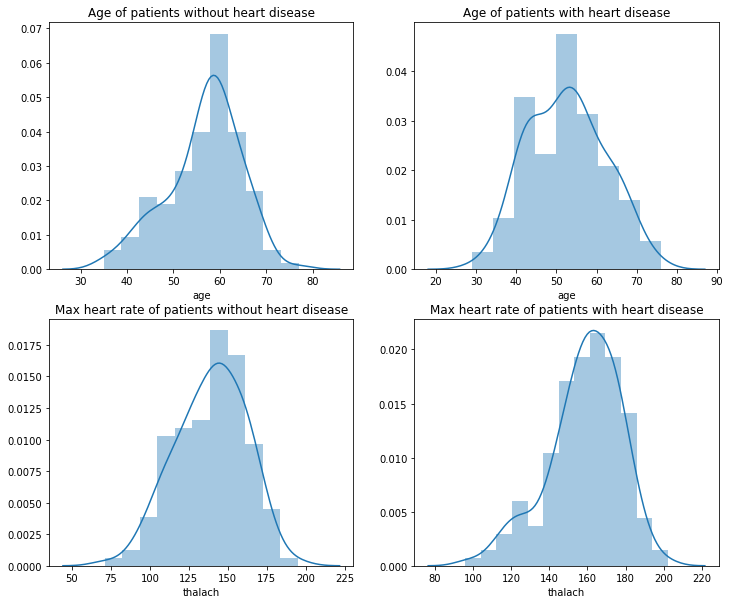

In [20]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df[df['target']==0].age)
plt.title('Age of patients without heart disease')

plt.subplot(222)
sns.distplot(df[df['target']==1].age)
plt.title('Age of patients with heart disease')

plt.subplot(223)
sns.distplot(df[df['target']==0].thalach )
plt.title('Max heart rate of patients without heart disease')

plt.subplot(224)
sns.distplot(df[df['target']==1].thalach )
plt.title('Max heart rate of patients with heart disease')
plt.show()

In [21]:
#Data preprocessing

In [22]:
X,y=df.loc[:,:'thal'],df['target']

In [23]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [24]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2,test_size=0.3,shuffle=True)

In [27]:
X_train.shape

(212, 13)

In [28]:
y_test.size

91

In [29]:
#decision tree classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [31]:
prediction=dt.predict(X_test)

In [32]:
prediction

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0], dtype=int64)

In [33]:
accuracy_dt=accuracy_score(y_test,prediction)*100

In [34]:
accuracy_dt

85.71428571428571

In [35]:
print("Feature importances:\n{}".format(dt.feature_importances_))

Feature importances:
[0.12336406 0.06413075 0.25029339 0.04257434 0.03018793 0.00950247
 0.04509575 0.07332736 0.0296952  0.09778794 0.02449524 0.11010951
 0.09943606]


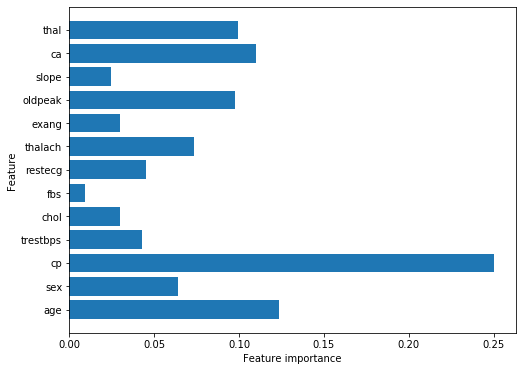

In [36]:
def plot_feature_importance(model):
    plt.figure(figsize=(8,6))
    n_features = 13
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importance(dt)

In [37]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [48]:
category=['No you dont have heart disease','Yes you have heart disease']

In [49]:
custom_data=np.array([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]])

In [50]:
custom_data_prediction_dt=dt.predict(custom_data)

In [51]:
custom_data_prediction_dt

array([1], dtype=int64)

In [52]:
int(custom_data_prediction_dt)

1

In [54]:
print(category[int(custom_data_prediction_dt)])

Yes you have heart disease


In [55]:
#KNN ALGORITHM

In [78]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [79]:
prediction_knn=knn.predict(X_test)

In [80]:
accuracy_knn=accuracy_score(y_test,prediction)*100

In [81]:
accuracy_knn

85.71428571428571

In [82]:
custom_data_knn=np.array([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]])

In [83]:
custom_data_prediction_knn=knn.predict(custom_data)

In [84]:
custom_data_knn

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ]])

In [85]:
print(category[int(custom_data_prediction_knn)])

No you dont have heart disease


In [86]:
k_range=range(1,26)
scores={}
scores_list=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    prediction_knn=knn.predict(X_test)
    scores[k]=accuracy_score(y_test,prediction_knn)
    scores_list.append(accuracy_score(y_test,prediction_knn))

In [87]:
scores

{1: 0.6703296703296703,
 2: 0.5604395604395604,
 3: 0.7142857142857143,
 4: 0.7032967032967034,
 5: 0.7142857142857143,
 6: 0.7142857142857143,
 7: 0.7362637362637363,
 8: 0.6813186813186813,
 9: 0.6813186813186813,
 10: 0.6813186813186813,
 11: 0.6813186813186813,
 12: 0.7032967032967034,
 13: 0.6813186813186813,
 14: 0.7142857142857143,
 15: 0.7142857142857143,
 16: 0.7362637362637363,
 17: 0.7142857142857143,
 18: 0.6923076923076923,
 19: 0.7252747252747253,
 20: 0.7362637362637363,
 21: 0.7142857142857143,
 22: 0.7252747252747253,
 23: 0.6923076923076923,
 24: 0.7362637362637363,
 25: 0.7032967032967034}

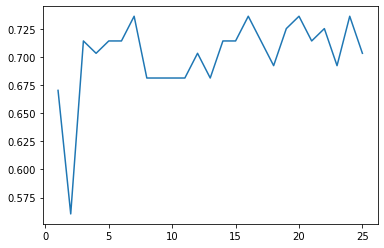

In [88]:
plt.plot(k_range,scores_list)

In [89]:
px.line(x=k_range,y=scores_list)

In [90]:
algorithms=['Decision Tree','KNN']
scores=[accuracy_dt,accuracy_knn]

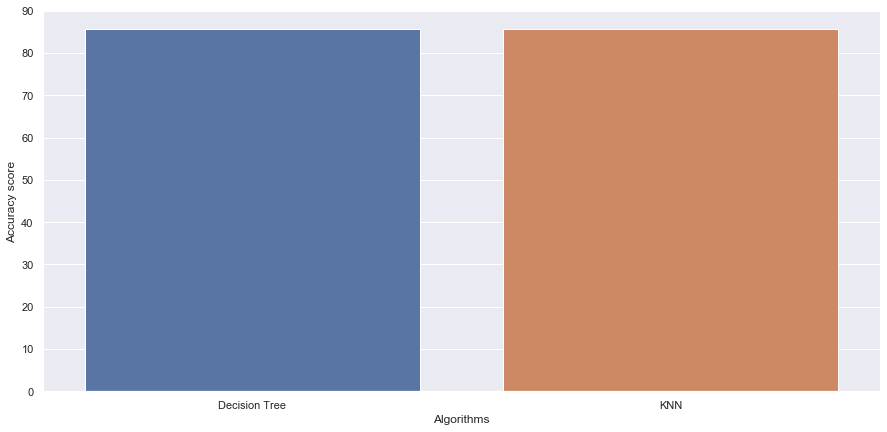

In [91]:
sns.set(rc={'figure.figsize':(15,7)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)
